<a href="https://colab.research.google.com/github/GeorgeSherif/Machine-Learning---Bachelor-Project/blob/main/Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing and mounting my google drive
import numpy as np
import pandas as pd
from time import time
from google.colab import drive
from IPython.display import display # Allows the use of display() for DataFrames
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data = pd.read_csv('gdrive/My Drive/Colab Notebooks/final.csv')
data = data.drop(['TimeStamp'], axis=1)
data.head()


,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,...,M14,M15,Intensity,NumberofMotors,PointsPercieved,Phantom Sensation,Xth,Yth,XPercieved,YPercieved
0,0.0,0.0,0.0,0.0,0.0,0.0,0.500,0.000,0.0,0.0,...,0.000,0.0,0.5,9,1 Point,Between 2 Points,1.00,9.00,3.691092,5.725965
1,0.0,0.0,0.0,0.0,0.0,0.0,0.375,0.375,0.0,0.0,...,0.125,0.0,0.5,9,1 Point,Between 4 Points,2.25,7.75,3.994580,4.998068
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,...,1.000,0.0,0.5,9,1 Point,Not Phantom,3.50,11.50,4.983287,10.664758
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1.000,0.0,0.0,...,0.000,0.0,0.5,9,1 Point,Not Phantom,3.50,6.50,4.622895,5.194861
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.500,0.0,0.0,...,0.500,0.0,0.5,9,1 Point,Between 2 Points,3.50,9.00,5.071014,8.981348


In [ ]:
import matplotlib.pyplot as plt
# Number of 1 Points and many 50%
data50 = data[data['Intensity'] == 0.5]
data50 = data50.drop(['M1','M2','M3','M4','M5','M6','M7','M8','M9','M10', 'M11','M12','M13','M14','M15','Intensity','NumberofMotors','Phantom Sensation'], axis=1)
data50_1Point = data50[data50['PointsPercieved'] == '1 Point']
data50_2Points = data50[data50['PointsPercieved'] == '2 or more Points']
print(data50_1Point.shape[0])
print(data50_2Points.shape[0])
total1 = data50_1Point.shape[0] + data50_2Points.shape[0]

# Number of 1 Points and many 50%
data100 = data[data['Intensity'] == 1]
data100 = data100.drop(['M1','M2','M3','M4','M5','M6','M7','M8','M9','M10', 'M11','M12','M13','M14','M15','Intensity','NumberofMotors','Phantom Sensation'], axis=1)
data100_1Point = data100[data100['PointsPercieved'] == '1 Point']
data100_2Points = data100[data100['PointsPercieved'] == '2 or more Points']
print(data100_1Point.shape[0])
print(data100_2Points.shape[0])
total2 = data100_1Point.shape[0] + data100_2Points.shape[0]

data = [[0.5, round(100 * data50_1Point.shape[0] / total1,1) , round(100 * data50_2Points.shape[0] / total1,1)], [1, round(100*  data100_1Point.shape[0] / total2,1) , round(100 * data100_2Points.shape[0] / total2 , 1)]]
df = pd.DataFrame(data, columns=['Intensity','1 Point' , 'More than 1 Point'])
print(df)


1599
1236
1469
1370
   Intensity  1 Point  More than 1 Point
0        0.5     56.4               43.6
1        1.0     51.7               48.3


In [ ]:
%pip uninstall matplotlib
%pip install matplotlib

Found existing installation: matplotlib 3.2.2
Uninstalling matplotlib-3.2.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.2.2-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.2.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib.libs/libpng16-cfdb1654.so.16.21.0
    /usr/local/lib/python3.7/dist-packages/matplotlib.libs/libz-a147dcb0.so.1.2.3
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.2.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/

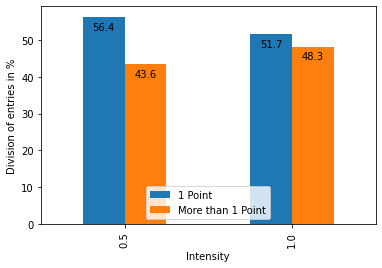

In [ ]:
ax = df.plot.bar(x='Intensity')
for container in ax.containers:
    ax.bar_label(container , padding = -15)
ax.set_ylabel("Division of entries in %")
ax = ax.legend(loc='lower center')


In [ ]:
data = pd.read_csv('gdrive/My Drive/Colab Notebooks/final.csv')
data = data.drop(['TimeStamp'], axis=1)
data4 = data[data['NumberofMotors'] == 4]
error4 = np.average(np.sqrt(np.power(data4['Xth'] - data4['XPercieved'] ,2) + np.power(data4['Yth'] - data4['YPercieved'] ,2))) 
print(error4)
data6 = data[data['NumberofMotors'] == 6]
error6 = np.average(np.sqrt(np.power(data6['Xth'] - data6['XPercieved'] ,2) + np.power(data6['Yth'] - data6['YPercieved'] ,2))) 
print(error6)
data9 = data[data['NumberofMotors'] == 9]
error9 = np.average(np.sqrt(np.power(data9['Xth'] - data9['XPercieved'] ,2) + np.power(data9['Yth'] - data9['YPercieved'] ,2))) 
print(error9)
data15 = data[data['NumberofMotors'] == 15]
error15 = np.average(np.sqrt(np.power(data15['Xth'] - data15['XPercieved'] ,2) + np.power(data15['Yth'] - data15['YPercieved'] ,2))) 
print(error15)
print("-----")

data = data[data['Intensity'] == 0.5]
data450 = data[(data['NumberofMotors']) == 4 ]
error450 = np.average(np.sqrt(np.power(data450['Xth'] - data450['XPercieved'] ,2) + np.power(data450['Yth'] - data450['YPercieved'] ,2))) 
print(error450)
data650 = data[(data['NumberofMotors']) == 6 ]

error650 = np.average(np.sqrt(np.power(data650['Xth'] - data650['XPercieved'] ,2) + np.power(data650['Yth'] - data650['YPercieved'] ,2))) 
print(error650)
data950 = data[(data['NumberofMotors']) == 9 ]
error950 = np.average(np.sqrt(np.power(data950['Xth'] - data950['XPercieved'] ,2) + np.power(data950['Yth'] - data950['YPercieved'] ,2))) 
print(error950)
data1550 = data[(data['NumberofMotors']) == 15 ]
error1550 = np.average(np.sqrt(np.power(data1550['Xth'] - data1550['XPercieved'] ,2) + np.power(data1550['Yth'] - data1550['YPercieved'] ,2))) 
print(error1550)
print("-----")
data = pd.read_csv('gdrive/My Drive/Colab Notebooks/final.csv')
data = data.drop(['TimeStamp'], axis=1)
data = data[data['Intensity'] == 1]


data4100 = data[data['NumberofMotors'] == 4]
error4100 = np.average(np.sqrt(np.power(data4100['Xth'] - data4100['XPercieved'] ,2) + np.power(data4100['Yth'] - data4100['YPercieved'] ,2))) 
print(error4100)
data6100 = data[data['NumberofMotors'] == 6]
error6100 = np.average(np.sqrt(np.power(data6100['Xth'] - data6100['XPercieved'] ,2) + np.power(data6100['Yth'] - data6100['YPercieved'] ,2))) 
print(error6100)
data9100 = data[data['NumberofMotors'] == 9]
error9100 = np.average(np.sqrt(np.power(data9100['Xth'] - data9100['XPercieved'] ,2) + np.power(data9100['Yth'] - data9100['YPercieved'] ,2))) 
print(error9100)
data15100 = data[data['NumberofMotors'] == 15]
error15100 = np.average(np.sqrt(np.power(data15100['Xth'] - data15100['XPercieved'] ,2) + np.power(data15100['Yth'] - data15100['YPercieved'] ,2))) 
print(error15100)
print("-----")

data = pd.read_csv('gdrive/My Drive/Colab Notebooks/final.csv')
data = data.drop(['TimeStamp'], axis=1)
data100 = data[data['Intensity'] == 1]
error100 = np.average(np.sqrt(np.power(data100['Xth'] - data100['XPercieved'] ,2) + np.power(data100['Yth'] - data100['YPercieved'] ,2))) 
print(error100)

data50 = data[data['Intensity'] == 0.5]
error50 = np.average(np.sqrt(np.power(data50['Xth'] - data50['XPercieved'] ,2) + np.power(data50['Yth'] - data50['YPercieved'] ,2))) 
print(error50)


2.1329405795249285
1.7984144685899444
1.4094188199147561
1.2716121064971477
-----
2.1496483062490817
2.078089010563476
1.4046427656050817
1.3179750031052688
-----
2.1164216406733645
1.520692961127401
1.4142015446913438
1.2247185901853572
-----
1.569527750018502
1.735877351329544


   Number of motors     Error
0                 4  2.132941
1                 6  1.798414
2                 9  1.409419
3                15  1.271612
   Number of motors   50%  100%
0                 4  2.15  2.12
1                 6  2.08  1.52
2                 9  1.40  1.41
3                15  1.32  1.22
   Number of motors     Error
0                 4  2.116422
1                 6  1.520693
2                 9  1.414202
3                15  1.224719
   Intensity     Error
0        0.5  1.735877
1        1.0  1.569528


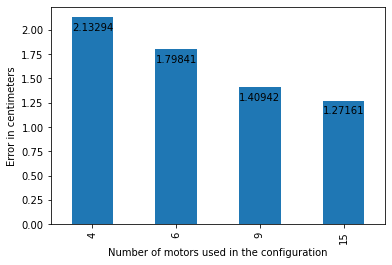

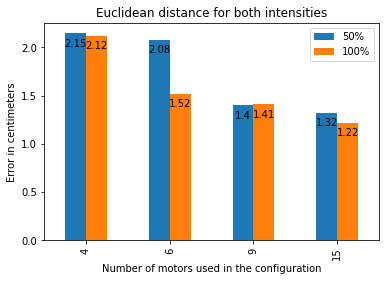

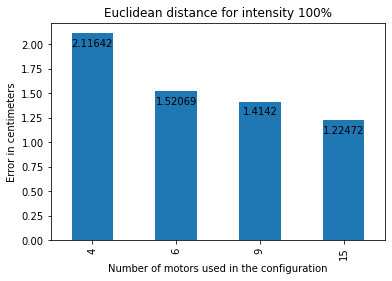

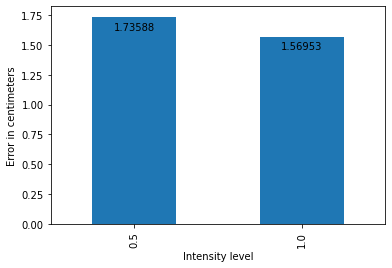

In [ ]:
data = [[4, error4], [6, error6],[9, error9],[15, error15]]
df = pd.DataFrame(data, columns=['Number of motors','Error'])
print(df)
ax = df.plot.bar(x='Number of motors', legend=False)
ax.set_xlabel("Number of motors used in the configuration")
ax.set_ylabel("Error in centimeters")
for container in ax.containers:
    ax.bar_label(container , padding = -15)

data = [[4, round(error450,2), round(error4100,2)], [6, round(error650,2),round(error6100,2)],[9, round(error950,2),round(error9100,2)],[15, round(error1550,2),round(error15100,2)]]
df = pd.DataFrame(data, columns=['Number of motors','50%' , '100%'])
print(df)
ax = df.plot.bar(x='Number of motors',  )
ax.set_xlabel("Number of motors used in the configuration")
ax.set_ylabel("Error in centimeters")
ax.set_title("Euclidean distance for both intensities")
for container in ax.containers:
    ax.bar_label(container , padding = -15)

data = [[4, error4100], [6, error6100],[9, error9100],[15, error15100]]
df = pd.DataFrame(data, columns=['Number of motors','Error'])
print(df)
ax = df.plot.bar(x='Number of motors', legend=False)
ax.set_xlabel("Number of motors used in the configuration")
ax.set_ylabel("Error in centimeters")
ax.set_title("Euclidean distance for intensity 100%")
for container in ax.containers:
    ax.bar_label(container , padding = -15)



data = [[0.5, error50], [1, error100]]
df = pd.DataFrame(data, columns=['Intensity','Error'])
print(df)
ax = df.plot.bar(x='Intensity', legend=False)
ax.set_xlabel("Intensity level")
ax.set_ylabel("Error in centimeters")
for container in ax.containers:
    ax.bar_label(container , padding = -15)

In [ ]:
from scipy import stats

data = [[4, 2.15],
        [6, 2.07],
        [9, 1.4],
        [15, 1.32]
        ]
df = pd.DataFrame(data, columns=['motors','error'])


print(stats.spearmanr(df[['motors']], df[['error']]))


SpearmanrResult(correlation=-1.0, pvalue=0.0)


   Number of motors  1 Point  More than 1 Point
0                 4     45.4               54.6
1                 6     55.1               44.9
2                 9     53.7               46.3
3                15     62.1               37.9
SpearmanrResult(correlation=0.7999999999999999, pvalue=0.20000000000000007)
342
358
428
283
376
341
453
254
   Number of motors  1 Point  More than 1 Point
0                 4     48.9               51.1
1                 6     60.2               39.8
2                 9     52.4               47.6
3                15     64.1               35.9
297
411
358
358
394
322
420
279
   Number of motors  1 Point  More than 1 Point
0                 4     41.9               58.1
1                 6     50.0               50.0
2                 9     55.0               45.0
3                15     60.1               39.9


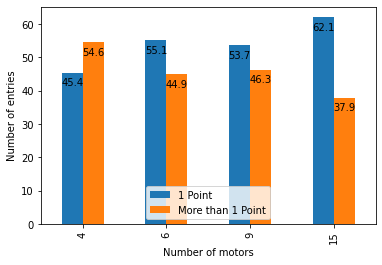

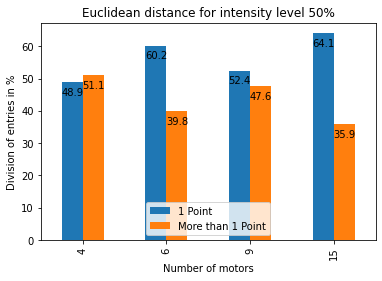

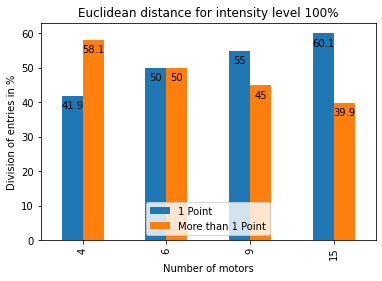

In [ ]:
data = pd.read_csv('gdrive/My Drive/Colab Notebooks/final.csv')
data = data.drop(['TimeStamp'], axis=1)

data4 = data[data['NumberofMotors'] == 4]
data4_1point = data4[data4['PointsPercieved']== '1 Point']
data4_2point = data4[data4['PointsPercieved']== '2 or more Points']

data6 = data[data['NumberofMotors'] == 6]
data6_1point = data6[data6['PointsPercieved']== '1 Point']
data6_2point = data6[data6['PointsPercieved']== '2 or more Points']

data9 = data[data['NumberofMotors'] == 9]
data9_1point = data9[data9['PointsPercieved']== '1 Point']
data9_2point = data9[data9['PointsPercieved']== '2 or more Points']

data15 = data[data['NumberofMotors'] == 15]
data15_1point = data15[data15['PointsPercieved']== '1 Point']
data15_2point = data15[data15['PointsPercieved']== '2 or more Points']
a41 = round(100 * data4_1point.shape[0] / (data4_1point.shape[0] + data4_2point.shape[0]),1 )
a42 = round(100 * data4_2point.shape[0] /  (data4_1point.shape[0] + data4_2point.shape[0]),1 )
a61 = round(100 * data6_1point.shape[0] / (data6_1point.shape[0] + data6_2point.shape[0]),1 )
a62 = round(100 * data6_2point.shape[0] / (data6_1point.shape[0] + data6_2point.shape[0]),1 )
a91 = round(100 * data9_1point.shape[0] / (data9_1point.shape[0] + data9_2point.shape[0]),1 )
a92 = round(100 * data9_2point.shape[0] / (data9_1point.shape[0] + data9_2point.shape[0]),1 )
a151 = round(100 * data15_1point.shape[0] / (data15_1point.shape[0] + data15_2point.shape[0]),1 )
a152 = round(100 * data15_2point.shape[0] / (data15_1point.shape[0] + data15_2point.shape[0]),1 )

data = [[4, a41 , a42], 
        [6, a61 , a62],
        [9, a91 , a92], 
        [15, a151 , a152]]
df = pd.DataFrame(data, columns=['Number of motors','1 Point' , 'More than 1 Point'])
print(df)

ax = df.plot.bar(x='Number of motors')
for container in ax.containers:
    ax.bar_label(container , padding = -15)
ax.set_ylabel("Number of entries")
ax = ax.legend(loc='lower center')

from scipy import stats

data = [[4, 639],
        [6, 786],
        [9, 770],
        [15, 873]
        ]
df = pd.DataFrame(data, columns=['motors','error'])

print(stats.spearmanr(df[['motors']], df[['error']]))


data450_1Point = data450[data450['PointsPercieved'] == '1 Point']
data450_2Points = data450[data450['PointsPercieved'] == '2 or more Points']
print(data450_1Point.shape[0])
print(data450_2Points.shape[0])

data650_1Point = data650[data650['PointsPercieved'] == '1 Point']
data650_2Points = data650[data650['PointsPercieved'] == '2 or more Points']
print(data650_1Point.shape[0])
print(data650_2Points.shape[0])

data950_1Point = data950[data950['PointsPercieved'] == '1 Point']
data950_2Points = data950[data950['PointsPercieved'] == '2 or more Points']
print(data950_1Point.shape[0])
print(data950_2Points.shape[0])

data1550_1Point = data1550[data1550['PointsPercieved'] == '1 Point']
data1550_2Points = data1550[data1550['PointsPercieved'] == '2 or more Points']
print(data1550_1Point.shape[0])
print(data1550_2Points.shape[0])


a41 = round(100 * data450_1Point.shape[0] / (data450_1Point.shape[0] + data450_2Points.shape[0]) ,1)
a42 = round(100 * data450_2Points.shape[0] /  (data450_1Point.shape[0] + data450_2Points.shape[0]),1 )
a61 = round(100 * data650_1Point.shape[0] / (data650_1Point.shape[0] + data650_2Points.shape[0]) ,1)
a62 = round(100 * data650_2Points.shape[0] / (data650_1Point.shape[0] + data650_2Points.shape[0]) ,1)
a91 = round(100 * data950_1Point.shape[0] / (data950_1Point.shape[0] + data950_2Points.shape[0]) ,1)
a92 = round(100 * data950_2Points.shape[0] / (data950_1Point.shape[0] + data950_2Points.shape[0]) ,1)
a151 = round(100 * data1550_1Point.shape[0] / (data1550_1Point.shape[0] + data1550_2Points.shape[0]),1 )
a152 = round(100 * data1550_2Points.shape[0] / (data1550_1Point.shape[0] + data1550_2Points.shape[0]) ,1)


data = [[4, a41 , a42 ], 
        [6, a61 , a62],
        [9,a91 ,a92 ], 
        [15, a151, a152]]
df = pd.DataFrame(data, columns=['Number of motors','1 Point' , 'More than 1 Point'])
print(df)

ax = df.plot.bar(x='Number of motors')
for container in ax.containers:
    ax.bar_label(container , padding = -15)
ax.set_ylabel("Division of entries in %")
ax.set_title("Euclidean distance for intensity level 50%")
ax = ax.legend(loc='lower center')







data4100_1Point = data4100[data4100['PointsPercieved'] == '1 Point']
data4100_2Points = data4100[data4100['PointsPercieved'] == '2 or more Points']
print(data4100_1Point.shape[0])
print(data4100_2Points.shape[0])

data6100_1Point = data6100[data6100['PointsPercieved'] == '1 Point']
data6100_2Points = data6100[data6100['PointsPercieved'] == '2 or more Points']
print(data6100_1Point.shape[0])
print(data6100_2Points.shape[0])

data9100_1Point = data9100[data9100['PointsPercieved'] == '1 Point']
data9100_2Points = data9100[data9100['PointsPercieved'] == '2 or more Points']
print(data9100_1Point.shape[0])
print(data9100_2Points.shape[0])

data15100_1Point = data15100[data15100['PointsPercieved'] == '1 Point']
data15100_2Points = data15100[data15100['PointsPercieved'] == '2 or more Points']
print(data15100_1Point.shape[0])
print(data15100_2Points.shape[0])

a41 = round(100 * data4100_1Point.shape[0] / (data4100_1Point.shape[0] + data4100_2Points.shape[0]) ,1)
a42 = round(100 * data4100_2Points.shape[0] /  (data4100_1Point.shape[0] + data4100_2Points.shape[0]) ,1)
a61 = round(100 * data6100_1Point.shape[0] / (data6100_1Point.shape[0] + data6100_2Points.shape[0]) ,1)
a62 = round(100 * data6100_2Points.shape[0] / (data6100_1Point.shape[0] + data6100_2Points.shape[0]) ,1)
a91 = round(100 * data9100_1Point.shape[0] / (data9100_1Point.shape[0] + data9100_2Points.shape[0]) ,1)
a92 = round(100 * data9100_2Points.shape[0] / (data9100_1Point.shape[0] + data9100_2Points.shape[0]) ,1)
a151 = round(100 * data15100_1Point.shape[0] / (data15100_1Point.shape[0] + data15100_2Points.shape[0]) ,1)
a152 = round(100 * data15100_2Points.shape[0] / (data15100_1Point.shape[0] + data15100_2Points.shape[0]),1 )

data = [[4, a41 , a42], 
        [6, a61 , a62],
        [9, a91 , a92], 
        [15, a151 , a152]]
df = pd.DataFrame(data, columns=['Number of motors','1 Point' , 'More than 1 Point'])
print(df)

ax = df.plot.bar(x='Number of motors')
for container in ax.containers:
    ax.bar_label(container , padding = -15)
ax.set_ylabel("Division of entries in %")
ax.set_title("Euclidean distance for intensity level 100%")
ax = ax.legend(loc='lower center')

2300
   Number of motors  Phantom vibrations  1 Point  More than 1 Point
0                 4                 637      286                351
1                 6                 617      344                273
2                 9                 574      262                312
3                15                 472      279                193
2307
   Number of motors  Phantom vibrations  1 Point  More than 1 Point
0                 4                 645      244                401
1                 6                 620      277                343
2                 9                 574      280                294
3                15                 468      245                223


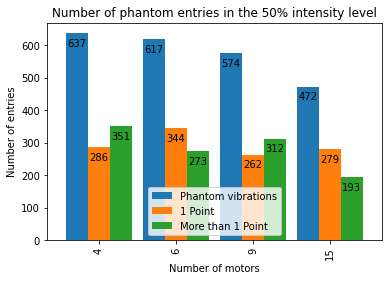

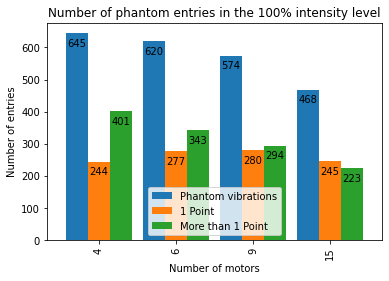

In [ ]:
data = pd.read_csv('gdrive/My Drive/Colab Notebooks/final.csv')
data = data[data['Intensity'] == 0.5]
data = data[data['Phantom Sensation'] != "Not Phantom"] 
print(data.shape[0])

data450 = data[(data['NumberofMotors']) == 4 ]
data450_1Point = data450[data450['PointsPercieved'] == '1 Point']
data450_2Points = data450[data450['PointsPercieved'] == '2 or more Points']

data650 = data[(data['NumberofMotors']) == 6 ]
data650_1Point = data650[data650['PointsPercieved'] == '1 Point']
data650_2Points = data650[data650['PointsPercieved'] == '2 or more Points']

data950 = data[(data['NumberofMotors']) == 9 ]
data950_1Point = data950[data950['PointsPercieved'] == '1 Point']
data950_2Points = data950[data950['PointsPercieved'] == '2 or more Points']

data1550 = data[(data['NumberofMotors']) == 15 ]
data1550_1Point = data1550[data1550['PointsPercieved'] == '1 Point']
data1550_2Points = data1550[data1550['PointsPercieved'] == '2 or more Points']

data = [[4, data450.shape[0] ,data450_1Point.shape[0] , data450_2Points.shape[0]],
        [6, data650.shape[0] , data650_1Point.shape[0] , data650_2Points.shape[0]],
        [9, data950.shape[0] ,data950_1Point.shape[0] , data950_2Points.shape[0]], 
        [15, data1550.shape[0] , data1550_1Point.shape[0] , data1550_2Points.shape[0]]]
df = pd.DataFrame(data, columns=['Number of motors','Phantom vibrations','1 Point' , 'More than 1 Point'])
print(df)

ax = df.plot.bar(x='Number of motors', width=0.85)
for container in ax.containers:
    ax.bar_label(container , padding = -15)
ax.set_ylabel("Number of entries")
ax.set_title("Number of phantom entries in the 50% intensity level")
ax = ax.legend(loc='lower center')


data = pd.read_csv('gdrive/My Drive/Colab Notebooks/final.csv')
data = data.drop(['TimeStamp'], axis=1)
data = data[data['Intensity'] == 1]
data = data[data['Phantom Sensation'] != "Not Phantom"] 
print(data.shape[0])
data4100 = data[data['NumberofMotors'] == 4]
data4100_1Point = data4100[data4100['PointsPercieved'] == '1 Point']
data4100_2Points = data4100[data4100['PointsPercieved'] == '2 or more Points']

data6100 = data[data['NumberofMotors'] == 6]
data6100_1Point = data6100[data6100['PointsPercieved'] == '1 Point']
data6100_2Points = data6100[data6100['PointsPercieved'] == '2 or more Points']

data9100 = data[data['NumberofMotors'] == 9]
data9100_1Point = data9100[data9100['PointsPercieved'] == '1 Point']
data9100_2Points = data9100[data9100['PointsPercieved'] == '2 or more Points']

data15100 = data[data['NumberofMotors'] == 15]
data15100_1Point = data15100[data15100['PointsPercieved'] == '1 Point']
data15100_2Points = data15100[data15100['PointsPercieved'] == '2 or more Points']


data = [[4, data4100.shape[0] ,data4100_1Point.shape[0] , data4100_2Points.shape[0]],
        [6, data6100.shape[0] , data6100_1Point.shape[0] , data6100_2Points.shape[0]],
        [9, data9100.shape[0] , data9100_1Point.shape[0] , data9100_2Points.shape[0]], 
        [15, data15100.shape[0] , data15100_1Point.shape[0] , data15100_2Points.shape[0]]]
df = pd.DataFrame(data, columns=['Number of motors','Phantom vibrations','1 Point' , 'More than 1 Point'])
print(df)

ax = df.plot.bar(x='Number of motors', width=0.85)
for container in ax.containers:
    ax.bar_label(container , padding = -15)
ax.set_ylabel("Number of entries")
ax.set_title("Number of phantom entries in the 100% intensity level")
ax = ax.legend(loc='lower center')
